In [8]:
import pandas as pd
import numpy as np

In [9]:
url = 'https://raw.githubusercontent.com/i183x/ML_class_VIT/master/Mall_Customers.csv'
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.shape

(200, 5)

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [15]:
df['Gender']=le.fit_transform(df['Gender'])
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [17]:
correlation = df.corr()['Spending Score (1-100)'].sort_values(ascending=False)
print(correlation)

Spending Score (1-100)    1.000000
CustomerID                0.013835
Annual Income (k$)        0.009903
Gender                   -0.058109
Age                      -0.327227
Name: Spending Score (1-100), dtype: float64


In [18]:
df.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [23]:
wcss

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556197,
 75350.77917248776,
 58300.44332159069,
 51084.505954934364,
 44344.94980177718,
 40953.73845841784,
 37602.692961061926]

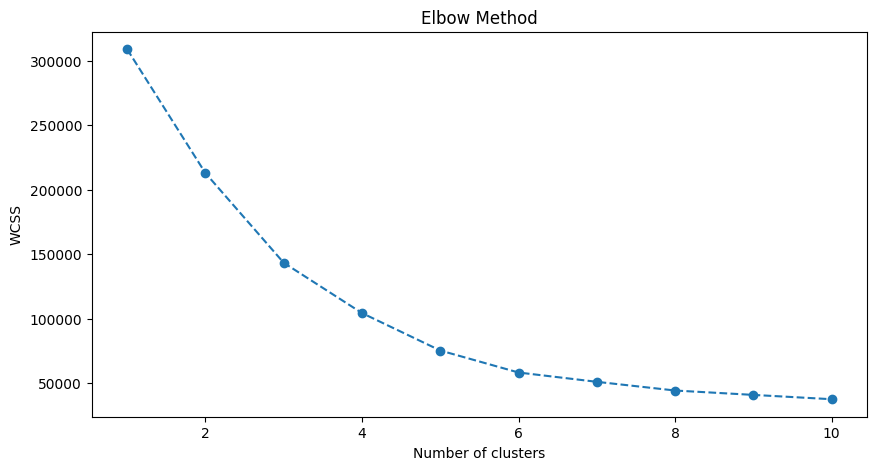

In [24]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [40]:
df['Cluster'] = kmeans.labels_
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

2    95
1    39
0    38
3    28
Name: Cluster, dtype: int64


In [41]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[40.39473684 87.         18.63157895]
 [32.69230769 86.53846154 82.12820513]
 [44.89473684 48.70526316 42.63157895]
 [24.82142857 28.71428571 74.25      ]]


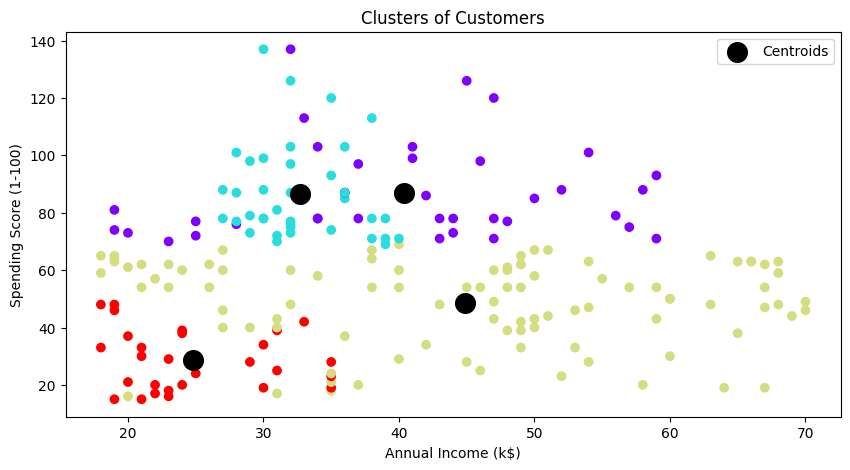

In [42]:
plt.figure(figsize=(10, 5))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()